In [29]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy. integrate import quad

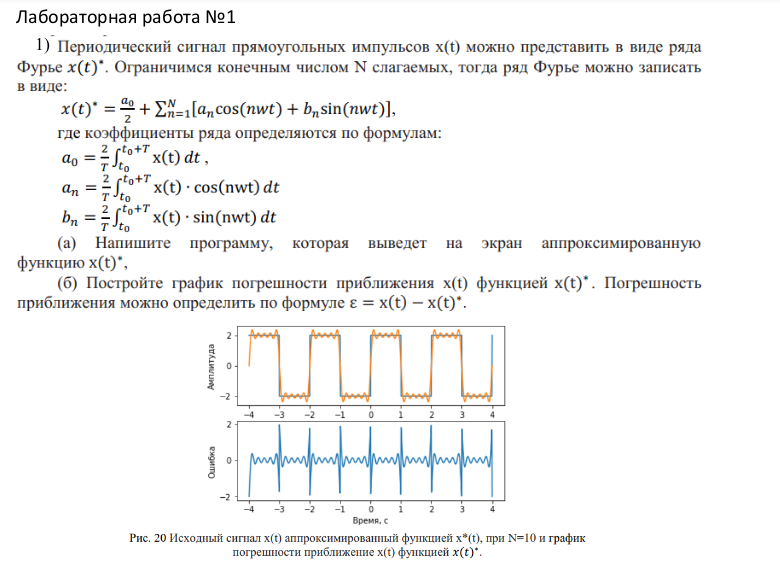

In [30]:
N = 10 # Количество отсчетов
fmax = 800 # максимальная частота
T = 1.0/fmax # Период
f= 2*np.pi/T # частота сигнала в Гц
t0=0

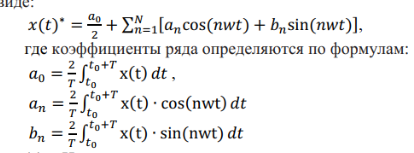

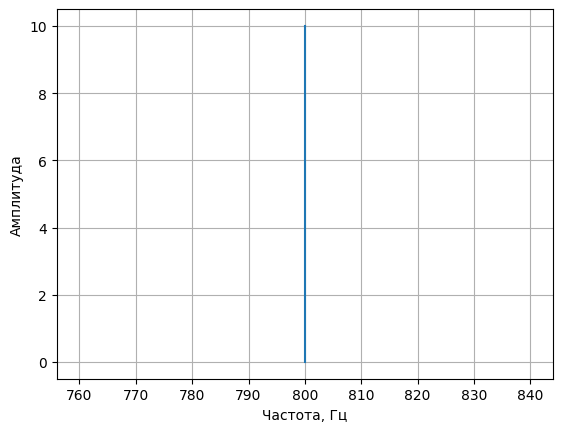

In [33]:
def x(t):
    return t

def b_n(t, n):
    return x(t) * np.sin(n * f * t)

def a_n(t, n):
    return x(t) * np.cos(n * f * t)

def a_0(t):
    return x(t)

def x_star(t):
    a0=(2.0/T) + quad(a_0, t0 + T, t0)[0]
    sigma = 0

    for n in range(N):
        an = (2/T) * quad(a_n, t0 + T, t0, args=(n))[0]
        bn = (2/T) * quad(a_n, t0 + T, t0, args=(n))[0]
        sigma += an+bn 


    return (a0/2) + sigma

list_point = []
for n in range(N):
    list_point.append(x_star(n))

plt.plot(list_point, np.linspace(0, N, num=N))
plt.grid()
plt.xlabel('Частота, Гц');
plt.ylabel('Фурье');

In [32]:
# def DFT_slow(x):
#     """Compute the discrete Fourier Transform of the 1D array x"""
#     x = np.asarray(x, dtype=float)
#     N = x.shape[0]
#     n = np.arange(N)
#     k = n.reshape((N, 1))
#     M = np.exp(-2j * np.pi * k * n / N)
#     return np.dot(M, x)

# N = 600 # Количество отсчетов
# fmax=800 # максимальная частота
# T = 1.0/fmax #
# f=100 # частота сигнала в Гц
# x = np.linspace(0.0, N*T, N)
# y = np.sin(f * 2.0*np.pi*x) #
# yf = DFT_slow(y)
# xf = np.linspace(0.0, fmax/2, N//2)
# yff = fft(y)
# fig = plt.figure(figsize=(8,8)) # размер полотна

# plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
# plt.subplot(221)
# plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
# plt.grid()
# plt.xlabel('Частота, Гц');
# plt.ylabel('Амплитуда');
# plt.subplot(222)
# plt.plot(xf, 2.0/N * np.abs(yff[0:N//2]))
# plt.grid()
# plt.xlabel('Частота, Гц')
# plt.ylabel('Амплитуда')

# def f(x):
#     return x

# Int=quad(f, -3, 2)
# print(Int)